# Grafos condicionais

São grafos onde possuem um ou mais condicionais que irá determinar a rota do nosso fluxo

### Criando estrutura do grafo

In [2]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph

class State(TypedDict):
    number1: int
    number2: int
    action: Literal["+", "-"]
    results: int

graph_builder = StateGraph(State)

### Criando nós

In [3]:
def node_add(state: State) -> State:
    number1 = state["number1"]
    number2 = state["number2"]

    return {
        "results": number1 + number2 
    }

def minus_node(state: State) -> State:
    number1 = state["number1"]
    number2 = state["number2"]

    return {
        "results": number1 - number2 
    }

def router_node(state: State) -> State:
    return {}

In [4]:
def condition_action(state: State) -> Literal["node_add", "minus_node"]:
    if state["action"] == "+":
        return "node_add"
    if state["action"] == "-":
        return "minus_node"

In [5]:
from langgraph.graph import START, END

graph_builder.add_node("node_add", node_add)
graph_builder.add_node("minus_node", minus_node)
graph_builder.add_node("router", router_node)

graph_builder.add_conditional_edges(
    "router",
    condition_action,
    {
        "node_add": "node_add",
        "minus_node": "minus_node"
    }
)
graph_builder.add_edge(START, "router")
graph_builder.add_edge("node_add", END)
graph_builder.add_edge("minus_node", END)

graph_compiled = graph_builder.compile()

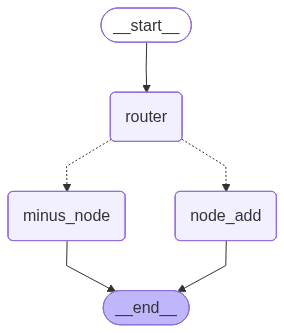

In [6]:
from IPython.display import display, Image


display(Image(graph_compiled.get_graph().draw_mermaid_png()))

# Rodando o grafo

In [7]:
state = {
    "number1": 45,
    "number2": 23,
    "action": "+",
    "results": 0
}

results = graph_compiled.invoke(state)

In [8]:
results

{'number1': 45, 'number2': 23, 'action': '+', 'results': 68}